# Weather Identifier with ANN & ESP32

KMITL - Artificial Intelligence Technology (01416500)
March - April 2022

Author:
Joseph Leandre Derpo - 63110107
Cherntay-Shih - 63110106
Nonthakorn Chencharatmatha - 63110114


#### Problems
Predicting the weather conditions using the ANN architecture with TFLite and ESP32

#### Data Engineering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install 'h5py==2.10.1' --force-reinstall

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [ ]:
import h5py
print(h5py.__version__)

2.10.0


In [ ]:
!pip uninstall tensorflow -y
!pip install  tensorflow==2.1.1

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 421.8 MB 42 kB/s 
     |████████████████████████████████| 41 kB 597 kB/s 
     |████████████████████████████████| 448 kB 44.2 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 3.8 MB 34.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=c5aaa555c405c605512d4237e5b9b983657925ab97c5e6cd3f0964870895c171
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tenso

In [ ]:
%tensorflow_version 2.1.1
import tensorflow as tf
print(tf.__version__)


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.1


In [ ]:
import os

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plot
#import keras_tuner as kt

from numpy import array, hstack, argmax

from pandas import DataFrame

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,BatchNormalization, Dense, RepeatVector, TimeDistributed, Dropout, Input, Conv1D

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/weatherHistory.csv")

dataframe[["Date-Time","TZ"]]=dataframe["Date"].str.split("+",expand=True)

dataframe = dataframe.drop(columns=["Date","Loud Cover", "Precip Type", "Daily Summary", "TZ", "Apparent Temperature (C)", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"])

In [ ]:
dataframe

,Summary,Temperature (C),Humidity,Date-Time
0,Partly Cloudy,9.472222,0.89,2006-04-01 00:00:00.000
1,Partly Cloudy,9.355556,0.86,2006-04-01 01:00:00.000
2,Mostly Cloudy,9.377778,0.89,2006-04-01 02:00:00.000
3,Partly Cloudy,8.288889,0.83,2006-04-01 03:00:00.000
4,Mostly Cloudy,8.755556,0.83,2006-04-01 04:00:00.000
...,...,...,...,...
96448,Partly Cloudy,26.016667,0.43,2016-09-09 19:00:00.000
96449,Partly Cloudy,24.583333,0.48,2016-09-09 20:00:00.000
96450,Partly Cloudy,22.038889,0.56,2016-09-09 21:00:00.000
96451,Partly Cloudy,21.522222,0.60,2016-09-09 22:00:00.000


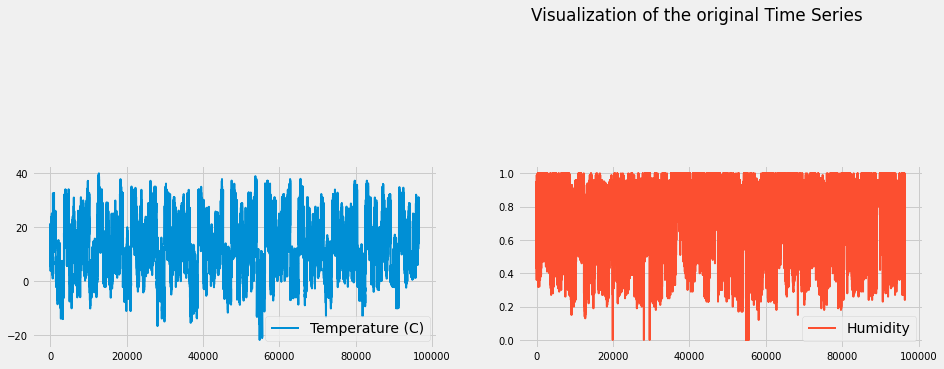

In [ ]:
# Plot the time series
plot.style.use('fivethirtyeight')
dataframe.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plot.show()

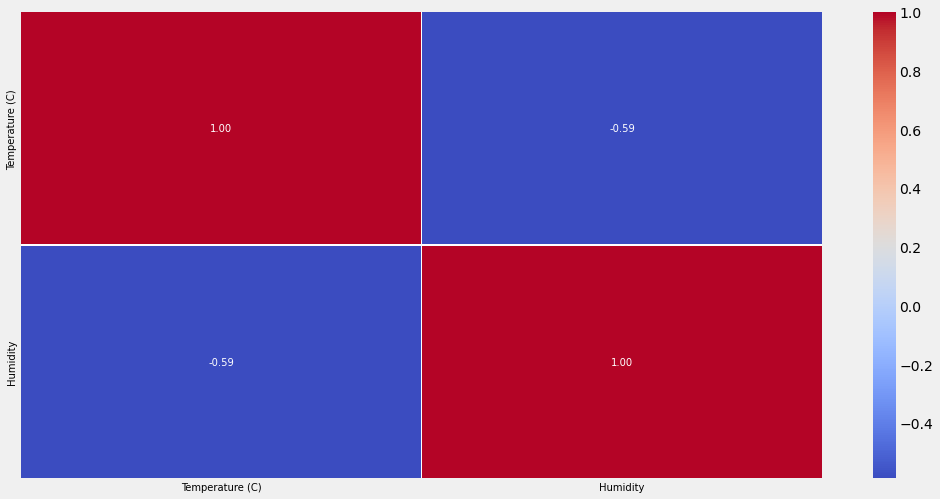

In [ ]:
# Let's also draw a heatmap visualization of the correlation matrix
correlation_matrix = dataframe.corr(method='spearman')
f, ax = plot.subplots(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plot.xticks(fontsize=10)
plot.yticks(fontsize=10)
plot.show()

In [ ]:
# Organized the columns
sorted_columns = ["Date-Time","Summary", "Temperature (C)", "Humidity"]
dataframe = dataframe.reindex(columns = sorted_columns)
dataframe

,Date-Time,Summary,Temperature (C),Humidity
0,2006-04-01 00:00:00.000,Partly Cloudy,9.472222,0.89
1,2006-04-01 01:00:00.000,Partly Cloudy,9.355556,0.86
2,2006-04-01 02:00:00.000,Mostly Cloudy,9.377778,0.89
3,2006-04-01 03:00:00.000,Partly Cloudy,8.288889,0.83
4,2006-04-01 04:00:00.000,Mostly Cloudy,8.755556,0.83
...,...,...,...,...
96448,2016-09-09 19:00:00.000,Partly Cloudy,26.016667,0.43
96449,2016-09-09 20:00:00.000,Partly Cloudy,24.583333,0.48
96450,2016-09-09 21:00:00.000,Partly Cloudy,22.038889,0.56
96451,2016-09-09 22:00:00.000,Partly Cloudy,21.522222,0.60


In [ ]:
dataframe.Summary.value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


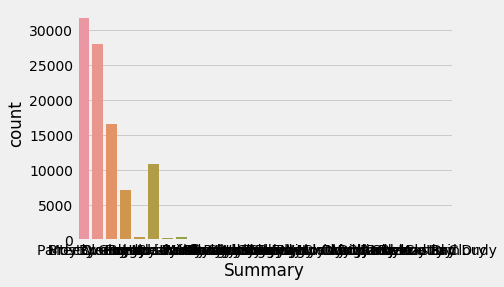

In [ ]:
sns.countplot(dataframe["Summary"])

In [ ]:
simplified_weather_types = {"cloudy":["Partly Cloudy", "Mostly Cloudy","Breezy and Mostly Cloudy","Breezy and Partly Cloudy", "Humid and Mostly Cloudy","Humid and Partly Cloudy",
                           "Windy and Partly Cloudy","Dry and Partly Cloudy","Windy and Mostly Cloudy","Dangerously Windy and Partly Cloudy","Dry and Mostly Cloudy"
                           ],
                 "rainy":["Rain", "Drizzle", "Light Rain", "Breezy and Overcast", "Overcast", "Windy and Overcast", "Humid and Overcast"],
                 "sunny":["Clear", "Windy and Dry", "Breezy and Dry", "Breezy", "Windy"],
                 "foggy":["Breezy and Foggy", "Windy and Foggy", "Windy and Foggy", "Foggy"]}

# There are more than 4 labels for summary so simplify it down into Cloudy,rainy,sunny, and foggy. 
def replace(content):
  for weather_categories in simplified_weather_types.keys():
    for weather in simplified_weather_types[weather_categories]:
      if content == weather:      
        return weather_categories
  print(content)

dataframe["Summary"] = dataframe["Summary"].map(replace)
print(dataframe)

print("Different weather types counts: \n",dataframe.Summary.value_counts())

dataframe_indexed_2 = dataframe[dataframe.Summary == "rainy"].sample(frac=0.4, random_state=42).index
dataframe = dataframe.drop(dataframe_indexed_2)

print("Dataframe after indexed_2:\n", dataframe)
print("Different weather types counts after indexed_2: \n", dataframe.Summary.value_counts())

dataframe_indexed_1 = dataframe[dataframe.Summary == "cloudy"].sample(frac=0.82, random_state=42).index
dataframe = dataframe.drop(dataframe_indexed_1)

print("Dataframe after indexed:\n", dataframe)
print("Different weather types counts after indexed: \n", dataframe.Summary.value_counts())


labels = dataframe["Summary"].unique()
print("Categories:", labels)

Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
Dry
                      Date-Time Summary  Temperature (C)  Humidity
0      2006-04-01 00:00:00.000   cloudy         9.472222      0.89
1      2006-04-01 01:00:00.000   cloudy         9.355556      0.86
2      2006-04-01 02:00:00.000   cloudy         9.377778      0.89
3      2006-04-01 03:00:00.000   cloudy         8.288889      0.83
4      2006-04-01 04:00:00.000   cloudy         8.755556      0.83
...                         ...     ...              ...       ...
96448  2016-09-09 19:00:00.000   cloudy        26.016667      0.43
96449  2016-09-09 20:00:00.000   cloudy        24.583333      0.48
96450  2016-09-09 21:00:00.000   cloudy        22.038889      0.56
96451  2016-09-09 22:00:00.000   cloudy        21.522222      0.60
96452  2016-09-09 23:00:00.000   cloudy        20.438889      0.61

[96453 rows x 4 columns]
Different weather types counts: 
 

In [ ]:

labels_dataframe = pd.get_dummies(dataframe, columns=["Summary"])

print(labels_dataframe)
print(labels_dataframe.shape)

                      Date-Time  Temperature (C)  Humidity  Summary_cloudy  \
9      2006-04-01 09:00:00.000         13.772222      0.72               1   
16     2006-04-01 16:00:00.000         15.388889      0.60               1   
21     2006-04-01 21:00:00.000         11.183333      0.76               1   
28     2006-04-10 04:00:00.000          6.111111      0.82               1   
47     2006-04-10 23:00:00.000         14.255556      0.59               0   
...                         ...              ...       ...             ...   
96434  2016-09-09 05:00:00.000         15.016667      0.90               0   
96435  2016-09-09 06:00:00.000         13.872222      0.93               0   
96436  2016-09-09 07:00:00.000         16.072222      0.88               0   
96437  2016-09-09 08:00:00.000         19.561111      0.75               1   
96449  2016-09-09 20:00:00.000         24.583333      0.48               1   

       Summary_foggy  Summary_rainy  Summary_sunny  
9         

In [ ]:
# Indexing the dataframe
dataframe = labels_dataframe.set_index("Date-Time")
dataframe.index = pd.to_datetime(dataframe.index)
dataframe

,Temperature (C),Humidity,Summary_cloudy,Summary_foggy,Summary_rainy,Summary_sunny
Date-Time,,,,,,
2006-04-01 09:00:00,13.772222,0.72,1,0,0,0
2006-04-01 16:00:00,15.388889,0.60,1,0,0,0
2006-04-01 21:00:00,11.183333,0.76,1,0,0,0
2006-04-10 04:00:00,6.111111,0.82,1,0,0,0
2006-04-10 23:00:00,14.255556,0.59,0,0,1,0
...,...,...,...,...,...,...
2016-09-09 05:00:00,15.016667,0.90,0,0,0,1
2016-09-09 06:00:00,13.872222,0.93,0,0,0,1
2016-09-09 07:00:00,16.072222,0.88,0,0,0,1


In [ ]:
dataframe_features = dataframe.iloc[:,:2]
dataframe_labels = dataframe.iloc[:,2:6]
print(dataframe_features)
print(dataframe_labels)

                     Temperature (C)  Humidity
Date-Time                                     
2006-04-01 09:00:00        13.772222      0.72
2006-04-01 16:00:00        15.388889      0.60
2006-04-01 21:00:00        11.183333      0.76
2006-04-10 04:00:00         6.111111      0.82
2006-04-10 23:00:00        14.255556      0.59
...                              ...       ...
2016-09-09 05:00:00        15.016667      0.90
2016-09-09 06:00:00        13.872222      0.93
2016-09-09 07:00:00        16.072222      0.88
2016-09-09 08:00:00        19.561111      0.75
2016-09-09 20:00:00        24.583333      0.48

[39526 rows x 2 columns]
                     Summary_cloudy  Summary_foggy  Summary_rainy  \
Date-Time                                                           
2006-04-01 09:00:00               1              0              0   
2006-04-01 16:00:00               1              0              0   
2006-04-01 21:00:00               1              0              0   
2006-04-10 04:00:0

In [ ]:
# Feature scaling the temperature columns to prevent gradient vanishing / exploding
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe_features = scaler.fit_transform(dataframe_features)
dataframe_features = pd.DataFrame(dataframe_features, columns=["Temperature (C)", "Humidity"])
dataframe_features

,Temperature (C),Humidity
0,0.576636,0.72
1,0.602826,0.60
2,0.534695,0.76
3,0.452525,0.82
4,0.584466,0.59
...,...,...
39521,0.596796,0.90
39522,0.578256,0.93
39523,0.613896,0.88
39524,0.670417,0.75


In [ ]:
# Check if there are any missing vlaues 
sum_array = np.sum(dataframe)
array_nan = np.isnan(sum_array)
print(array_nan)

Temperature (C)    False
Humidity           False
Summary_cloudy     False
Summary_foggy      False
Summary_rainy      False
Summary_sunny      False
dtype: bool


In [ ]:
# Constants Hyperparameters
STEPS_IN_N = 1 #  supposed to be 2
STEPS_OUT_N = 1
EPOCHS = 100
N_FEATURES = 2 #  temp, hum, apparent temp, pressure, wind speed
N_NEURONS = 16 #  original: 256
N_LABELS = 4
PATIENCE = 20

In [ ]:
#x_train, x_test, y_train, y_test = split_sequence(dataframe_stacked, STEPS_IN_N, STEPS_OUT_N)

x_train, x_test, y_train, y_test = train_test_split(dataframe_features, dataframe_labels, test_size = 0.15, shuffle=True, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(33597, 2) (5929, 2) (33597, 4) (5929, 4)


In [ ]:
x_train

,Temperature (C),Humidity
23921,0.371524,0.96
32274,0.542615,0.93
33172,0.677977,0.90
38832,0.441634,0.81
36289,0.497525,1.00
...,...,...
6265,0.394834,0.86
11284,0.639816,0.52
38158,0.638556,0.97
860,0.265053,0.77


In [ ]:
y_train

,Summary_cloudy,Summary_foggy,Summary_rainy,Summary_sunny
Date-Time,,,,
2012-01-08 23:00:00,0,1,0,0
2014-10-18 00:00:00,0,0,0,1
2015-08-06 01:00:00,1,0,0,0
2016-11-21 18:00:00,1,0,0,0
2015-09-13 04:00:00,0,0,0,1
...,...,...,...,...
2007-03-12 02:00:00,0,0,0,1
2009-04-15 11:00:00,0,0,0,1
2016-06-21 04:00:00,1,0,0,0


In [ ]:
#x_train = x_train.values.reshape((len(x_train), 1, 5))
#y_train = y_train.values.reshape((len(y_train), 1, 4))
#x_test = x_test.values.reshape((len(x_test), 1, 5))
#y_test = y_test.values.reshape((len(y_test), 1,  4))

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)


x_train:  (33597, 2)
y_train:  (33597, 4)
x_test:  (5929, 2)
y_test:  (5929, 4)


In [ ]:
#ANN Architecture

model = Sequential()

model.add(Input(shape=(N_FEATURES,)))

model.add(Dense(64,activation="elu"))
model.add(Dropout(0.25))

model.add(Dense(32,activation="elu"))
model.add(Dropout(0.25))

model.add(Dense(N_LABELS,activation="softmax"))

print(model.summary())

#tf.keras.utils.plot_model(model, show_shapes=True)

batch_size = 25
opt = tf.keras.optimizers.Adam(learning_rate=0.00025, beta_1 = 0.97, decay=1e-7) #  original: 0.00005 (0.00025), 0.97, 5e-7
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['categorical_accuracy'])

# this callback EarlyStopping will stop the training when there is no improvement in the validation loss for 'patience' conseccutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = PATIENCE, verbose = 1)

history = model.fit(x_train[:-1], y_train[:-1], epochs = EPOCHS, validation_data = (x_test, y_test), batch_size = batch_size, callbacks = [callback], verbose = 1)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                192       
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 132       
Total params: 2,404
Trainable params: 2,404
Non-trainable params: 0
_________________________________________________________________
None
Train on 33596 samples, validate on 5929 samples
Epoch 1/100
33596/33596 [==============================] - 7s 19

In [ ]:
model.save("ANN_WeatherModel_Two_Params_ELU.h5")

In [ ]:
model_history = history.history
print(model_history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


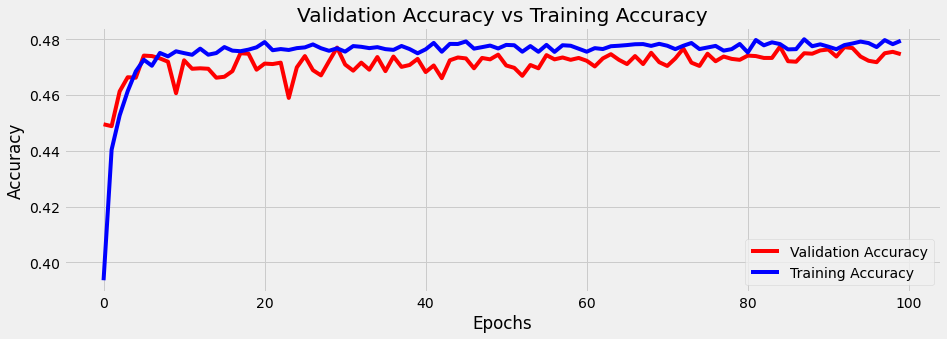

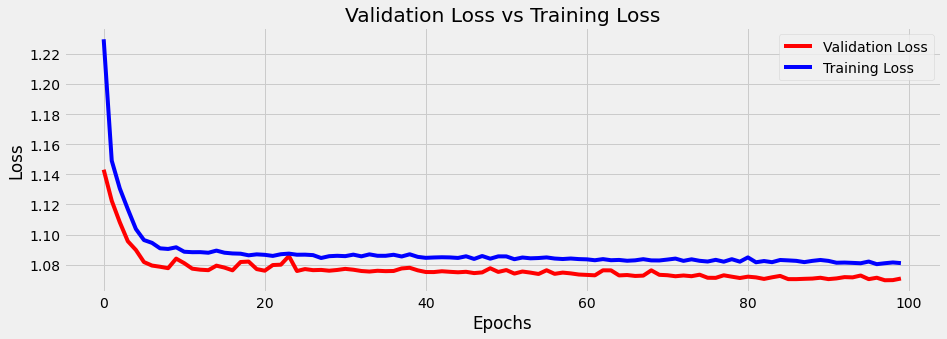

In [ ]:

validation_accu = model_history['val_categorical_accuracy']
model_loss = model_history['loss']
validation_loss = model_history['val_loss']
model_accu = model_history['categorical_accuracy']
epochs = range(len(model_accu))

#plot for validation accuracy and Training Accuracy
plot.figure(figsize = (14,10))
plot.subplot(211)
plot.plot(epochs, validation_accu, 'r', label = 'Validation Accuracy')
plot.plot(epochs, model_accu, 'b', label = 'Training Accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.title('Validation Accuracy vs Training Accuracy')
plot.legend()

#plot for validation loss and Training loss
plot.figure(figsize = (14,10))
plot.subplot(212)
plot.plot(epochs, validation_loss, 'r', label = 'Validation Loss')
plot.plot(epochs, model_loss, 'b', label = 'Training Loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.title('Validation Loss vs Training Loss')
plot.legend()

plot.show()


#### Keras Tuner
While it might be easier to tune everything manually, but that is only when the training is done within a minute or you got a lot of time to spare. Otherwise, the best choice would be the keras-tuner which would help us find the best hyperparameter values to train our model.

In [ ]:
"""
def tune_model(hp):
    model = Sequential()

    model.add(LSTM(hp.Int("LSTM_Nuerons",
                          min_value=16,
                          max_value=256,
                          step=16), input_shape = (STEPS_IN_N, N_FEATURES), return_sequences=False))
    
    model.add(RepeatVector(STEPS_OUT_N))
    model.add(Dropout(rate=hp.Float("Dropout",
                                     min_value=0.2,
                                     max_value=0.5,
                                     step=0.05)))

    
    model.add(LSTM(hp.Int("LSTM_Nuerons",
                          min_value=16,
                          max_value=256,
                          step=16), return_sequences=True))
    
    model.add(Dropout(rate=hp.Float("Dropout",
                                     min_value=0.2,
                                     max_value=0.5,
                                     step=0.05)))

    
    model.add(TimeDistributed(Dense(N_LABELS, activation='softmax')))

    batch_size = 32
    opt = tf.keras.optimizers.Adam(hp.Float(
                    "learning_rate",
                    min_value=0.000001,
                    max_value=0.005,
                    step=0.00001
                ), 
                    hp.Float(
                    "beta_1_unit",
                    min_value=0.9,
                    max_value=0.97,
                    step=0.01
                    ), 
                    hp.Float(
                    "decay_unit",
                    min_value=1e-7,
                    max_value=1e-3,
                    step=1e-6))
    
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['categorical_accuracy'])
    
    return model
"""

'\ndef tune_model(hp):\n    model = Sequential()\n\n    model.add(LSTM(hp.Int("LSTM_Nuerons",\n                          min_value=16,\n                          max_value=256,\n                          step=16), input_shape = (STEPS_IN_N, N_FEATURES), return_sequences=False))\n    \n    model.add(RepeatVector(STEPS_OUT_N))\n    model.add(Dropout(rate=hp.Float("Dropout",\n                                     min_value=0.2,\n                                     max_value=0.5,\n                                     step=0.05)))\n\n    \n    model.add(LSTM(hp.Int("LSTM_Nuerons",\n                          min_value=16,\n                          max_value=256,\n                          step=16), return_sequences=True))\n    \n    model.add(Dropout(rate=hp.Float("Dropout",\n                                     min_value=0.2,\n                                     max_value=0.5,\n                                     step=0.05)))\n\n    \n    model.add(TimeDistributed(Dense(N_LABELS, activat

In [ ]:
"""
tuner = kt.RandomSearch(
    hypermodel=tune_model,
    objective="val_loss",
    max_trials=25,
    executions_per_trial=2,
)
"""

'\ntuner = kt.RandomSearch(\n    hypermodel=tune_model,\n    objective="val_loss",\n    max_trials=25,\n    executions_per_trial=2,\n)\n'

In [ ]:
#tuner.search(x_train, y_train, epochs = 30, validation_data=(x_test, y_test), verbose = 2)

In [ ]:
"""
print(tuner.results_summary())

print("\n\n",tuner.search_space_summary())

best_model = tuner.get_best_models()[0]
print(best_model)
"""

'\nprint(tuner.results_summary())\n\nprint("\n\n",tuner.search_space_summary())\n\nbest_model = tuner.get_best_models()[0]\nprint(best_model)\n'

#### Testing the prediction
We test the prediction by printing out the expected result on the left with the predicted result on the right to see whether or not if the model perfectly label the weather.

In [ ]:
#labels = np.array(["Cloudy", "Foggy", "Rainy", "Sunny"])

#predicted = model.predict(x_test, batch_size=1, verbose=1)

#print("Predicted:\n",predicted)

#predicted = np.argmax(predicted, axis=-1)
#predicted = labels[predicted]

#print("Predicted:\n",predicted)

#expected_result = labels[np.argmax(y_test, axis=None)]

#print("Expected:\n",expected_result)

#unique_pred, frequency_pred = np.unique(predicted, return_counts = True)

#unique_test, frequency_test = np.unique(expected_result, return_counts = True)

# print unique values array
#print("Unique Prediction Values:", 
#      unique_pred)
  
# print frequency array
#print("Frequency Prediction Values:",
#      frequency_pred)

# print unique values array
#print("Unique Test Values:", 
#      unique_test)
  
# print frequency array
#print("Frequency Test Values:",
#      frequency_test)

#print(f"Expected weather condition: \n{expected_result}\nPredicted weather condition: \n{predicted}\n")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted = model.predict(x_test, batch_size=1, verbose=1)
#predicted = np.argmax(predicted, axis=-1)
#predicted = labels[predicted]

predicted = np.where(predicted >= 0.5, 1, 0)

#predicted = np.unravel_index(np.argmax(predicted), np.array(x_test).shape)

#predicted = np.argmax(predicted, axis=-1)

print(predicted)

#y_test = y_test.values.argmax(axis=1)

print("Accuracy: %f" % accuracy_score(y_test, predicted))
print("Precision: %f" % precision_score(y_test, predicted, average="micro"))
print("Recall: %f" % recall_score(y_test, predicted, average="micro"))
print("F1 score: %f" % f1_score(y_test, predicted, average="micro"))

print(classification_report(predicted, y_test))

5929/5929 [==============================] - 9s 1ms/sample
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 ...
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Accuracy: 0.198853
Precision: 0.625133
Recall: 0.199122
F1 score: 0.302037
              precision    recall  f1-score   support

           0       0.28      0.54      0.37       857
           1       0.68      0.70      0.69      1028
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1

   micro avg       0.20      0.63      0.30      1886
   macro avg       0.24      0.31      0.26      1886
weighted avg       0.50      0.63      0.54      1886
 samples avg       0.20      0.20      0.20      1886



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


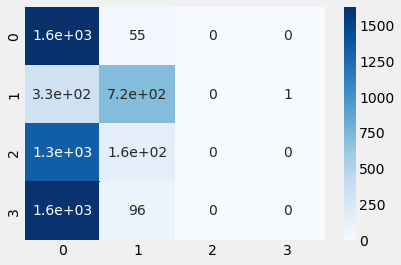

In [ ]:
# Using heatmap, it should show that the heatmap has a straight diagonal line from top left to bottom
# right without other gradients on the side showing that it is predicting perfectly

# The higher the number of the block shows that the model thinks that the two variables are correlated
# to each other.

sns.heatmap(confusion_matrix(y_test.values.argmax(axis=1), predicted.argmax(axis=1)), annot = True, cmap="Blues")

#### Conversion of model to tensorflow lite Float32 model

In [ ]:
root_path = "/content/"
model_filename = 'ANN_WeatherModel_Two_Params_ELU.h5'
checkpoint_filepath = os.path.join(root_path, model_filename)
model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
# model = '/content/ANN_WeatherModel_Two_Params.h5'
# loaded_model = tf.keras.models.load_model(model)

In [ ]:
#def representative_dataset_gen():
#    for i in range(100):
#      data = np.expand_dims(x_test[i], axis=0)
#      yield [data.astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
#converter.target_spec.supported_types = [tf.float16]
converter._experimental_lower_tensor_list_ops = False
converter.inference_type = tf.float32
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

print(len(tflite_model))

#train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#representative_dataset = tf.data.Dataset.from_tensor_slices(y_train.astype(np.int8))

#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]

#converter.representative_dataset = representative_dataset_gen
#tflite_model = converter.convert()

5360


In [ ]:
interpreter = tf.lite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

#input_scale, input_zero_point = interpreter.get_tensor_details()[0]["quantization"]
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_details

[{'dtype': numpy.float32,
  'index': 1,
  'name': 'dense_24_input',
  'quantization': (0.0, 0),
  'shape': array([1, 2], dtype=int32)}]

In [ ]:
output_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'Identity',
  'quantization': (0.0, 0),
  'shape': array([1, 4], dtype=int32)}]

In [ ]:
#for i in range(10):
#  predict_ids = np.array(x_test[i:i+1])
#  print(predict_ids)

#  expected = model.predict(predict_ids)
#  print(expected)

# input_ids = np.array(x_test[i:i+1,:], dtype=np.float32)
#  print(input_ids)

#  print(model.predict(input_ids))

#  set_tensor_details = interpreter.set_tensor(input_details[0]['index'], input_ids)
#  print(set_tensor_details)

#  invoke_details = interpreter.invoke()
#  print(invoke_details)

#  result = interpreter.get_tensor(output_details[0]['index'])
# print(result)

  # Assert if the result of TFLite model is consistent with the TF model.
#  np.testing.assert_almost_equal(expected, result, decimal=2)
#  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

  # Please note: TfLite fused Lstm kernel is stateful, so we need to reset
  # the states.
  # Clean up internal states.
#  interpreter.reset_all_variables()

In [ ]:
open("ANN_WeatherModel_Two_Params.tflite", "wb").write(tflite_model)

basic_model_size = os.path.getsize("ANN_WeatherModel_Two_Params.tflite")
print("Model is %d bytes" % basic_model_size)

!apt install xxd
!xxd -i ANN_WeatherModel_Two_Params.tflite > ANN_WeatherModel_Two_Params.h
    


Model is 5360 bytes
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xxd is already the newest version (2:8.0.1453-1ubuntu1.8).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
model_h_size = os.path.getsize("ANN_WeatherModel_Two_Params.h")
print(f"Header file, ANN_WeatherModel_Two_Params.h, is {model_h_size:,} bytes.")

Header file, ANN_WeatherModel_Two_Params.h, is 33,171 bytes.
